In [4]:
#region Basic_Import
## Basic
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.path.dirname(os.path.abspath('__file__'))
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from pandas import DataFrame, Series

import math, random

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

## 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm
import tqdm

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [5]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from keras.models import Sequential, load_model
    from keras_flops import get_flops
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [6]:
## Import_Local
from Src_Dev_Common import Data_Datetime as com_date
# from Src_Dev_Common import DEV_KASI_Holiday as com_Holi
# from Src_Dev_Common import DEV_Common_Data_Analysis as com_Analysis
from Src_Dev_Common import Data_Preprocessing as com_Prep
from Src_Dev_Common import Common_Model as com_Model
# from Src_Dev_Common import DEV_Common_Data_Visualization as com_Visual
# from Src_Dev_Common import DEV_KMA_Weather_ASOS as com_ASOS
# from Src_Dev_Common import DEV_KDHC_Usage as com_KDHC
# from Src_Dev_Common import DEV_KIER_Usage as com_KIER

In [7]:
# !pip install catboost
from catboost import Pool, CatBoostRegressor

## Data Load

In [8]:
## Raw Data Load
df_KIER_5Domain = pd.read_csv('KIER_Merged_5domain_2024-07-08.csv', index_col = 0)
df_KIER_5Domain['METER_DATE'] = pd.to_datetime(df_KIER_5Domain['METER_DATE'])
print(df_KIER_5Domain.shape, "///", df_KIER_5Domain.columns)
df_KIER_5Domain

(16413, 29) /// Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'HOUR',
       'MINUTE', 'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity',
       'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'ELEC_INST', 'HEAT_INST', 'WATER_INST', 'HOT_INST', 'GAS_INST'],
      dtype='object')


,METER_DATE,YEAR,MONTH,DAY,code_day_of_the_week,HOUR,MINUTE,temp_outdoor,temp_dew_point,temp_ground,...,sunshine,solar_radiation,cloud_total,cloud_midlow,visual_range,ELEC_INST,HEAT_INST,WATER_INST,HOT_INST,GAS_INST
0,2022-07-20 13:00:00,2022,7,20,2,13,0,29.8000000000,21.4000000000,41.5000000000,...,1.0000000000,2.8900000000,8.0000000000,2.0000000000,1903.0000000000,194.7787303232,0.0001975346,7.0350500000,0.0000093275,0.0000000000
1,2022-07-20 14:00:00,2022,7,20,2,14,0,30.4000000000,20.0000000000,42.4000000000,...,1.0000000000,2.8500000000,8.0000000000,1.0000000000,1986.0000000000,185.5468089258,0.0001975346,7.0453500000,0.0000031403,0.0003690685
2,2022-07-20 15:00:00,2022,7,20,2,15,0,30.5000000000,21.0000000000,41.9000000000,...,0.8000000000,2.3800000000,7.0000000000,2.0000000000,1985.0000000000,191.8368089258,0.0001975346,6.4400500000,0.0000034357,0.0102684149
3,2022-07-20 16:00:00,2022,7,20,2,16,0,30.8000000000,20.7000000000,39.7000000000,...,1.0000000000,2.1900000000,5.0000000000,3.0000000000,1993.0000000000,185.9038264696,0.0001975346,7.4170000000,0.0000072374,0.0218035922
4,2022-07-20 17:00:00,2022,7,20,2,17,0,29.5000000000,20.0000000000,34.5000000000,...,0.3000000000,1.0200000000,9.0000000000,1.0000000000,2000.0000000000,189.2517825136,0.0001975346,10.2510000000,0.0000123613,0.0218035922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16408,2024-06-03 05:00:00,2024,6,3,0,5,0,13.1000000000,10.8000000000,14.7000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,2976.0000000000,80.6379999998,0.0000000000,6.0601202899,0.0000305033,0.0000000000
16409,2024-06-03 06:00:00,2024,6,3,0,6,0,13.7000000000,10.8000000000,15.0000000000,...,0.1000000000,0.0500000000,0.0000000000,0.0000000000,3874.0000000000,85.4079999998,0.0000000000,8.2929202899,0.0000944223,0.1200000000
16410,2024-06-03 07:00:00,2024,6,3,0,7,0,18.0000000000,11.9000000000,17.0000000000,...,1.0000000000,0.5600000000,0.0000000000,0.0000000000,5000.0000000000,111.6829999997,0.0000000000,11.7601202899,0.0002607810,0.3600000000
16411,2024-06-03 08:00:00,2024,6,3,0,8,0,19.7000000000,12.2000000000,22.5000000000,...,1.0000000000,1.2500000000,0.0000000000,0.0000000000,5000.0000000000,121.9929999998,0.0000000000,9.9387202899,0.0000540724,0.3800000000


In [9]:
## Raw Data Check
df_KIER_5Domain = pd.read_csv('KIER_Merged_5domain_2024-07-08.csv', index_col = 0)
df_KIER_5Domain['METER_DATE'] = pd.to_datetime(df_KIER_5Domain['METER_DATE'])
print(df_KIER_5Domain.shape, "///", df_KIER_5Domain.columns)
df_KIER_5Domain

(16413, 29) /// Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'HOUR',
       'MINUTE', 'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity',
       'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'ELEC_INST', 'HEAT_INST', 'WATER_INST', 'HOT_INST', 'GAS_INST'],
      dtype='object')


,METER_DATE,YEAR,MONTH,DAY,code_day_of_the_week,HOUR,MINUTE,temp_outdoor,temp_dew_point,temp_ground,...,sunshine,solar_radiation,cloud_total,cloud_midlow,visual_range,ELEC_INST,HEAT_INST,WATER_INST,HOT_INST,GAS_INST
0,2022-07-20 13:00:00,2022,7,20,2,13,0,29.8000000000,21.4000000000,41.5000000000,...,1.0000000000,2.8900000000,8.0000000000,2.0000000000,1903.0000000000,194.7787303232,0.0001975346,7.0350500000,0.0000093275,0.0000000000
1,2022-07-20 14:00:00,2022,7,20,2,14,0,30.4000000000,20.0000000000,42.4000000000,...,1.0000000000,2.8500000000,8.0000000000,1.0000000000,1986.0000000000,185.5468089258,0.0001975346,7.0453500000,0.0000031403,0.0003690685
2,2022-07-20 15:00:00,2022,7,20,2,15,0,30.5000000000,21.0000000000,41.9000000000,...,0.8000000000,2.3800000000,7.0000000000,2.0000000000,1985.0000000000,191.8368089258,0.0001975346,6.4400500000,0.0000034357,0.0102684149
3,2022-07-20 16:00:00,2022,7,20,2,16,0,30.8000000000,20.7000000000,39.7000000000,...,1.0000000000,2.1900000000,5.0000000000,3.0000000000,1993.0000000000,185.9038264696,0.0001975346,7.4170000000,0.0000072374,0.0218035922
4,2022-07-20 17:00:00,2022,7,20,2,17,0,29.5000000000,20.0000000000,34.5000000000,...,0.3000000000,1.0200000000,9.0000000000,1.0000000000,2000.0000000000,189.2517825136,0.0001975346,10.2510000000,0.0000123613,0.0218035922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16408,2024-06-03 05:00:00,2024,6,3,0,5,0,13.1000000000,10.8000000000,14.7000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,2976.0000000000,80.6379999998,0.0000000000,6.0601202899,0.0000305033,0.0000000000
16409,2024-06-03 06:00:00,2024,6,3,0,6,0,13.7000000000,10.8000000000,15.0000000000,...,0.1000000000,0.0500000000,0.0000000000,0.0000000000,3874.0000000000,85.4079999998,0.0000000000,8.2929202899,0.0000944223,0.1200000000
16410,2024-06-03 07:00:00,2024,6,3,0,7,0,18.0000000000,11.9000000000,17.0000000000,...,1.0000000000,0.5600000000,0.0000000000,0.0000000000,5000.0000000000,111.6829999997,0.0000000000,11.7601202899,0.0002607810,0.3600000000
16411,2024-06-03 08:00:00,2024,6,3,0,8,0,19.7000000000,12.2000000000,22.5000000000,...,1.0000000000,1.2500000000,0.0000000000,0.0000000000,5000.0000000000,121.9929999998,0.0000000000,9.9387202899,0.0000540724,0.3800000000


##  For Scaling

In [10]:
scaler_data = MinMaxScaler()
scaler_data.fit(data)
scaled_data = scaler_data.transform(data)

new_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

elec_X = new_data.drop(['HEAT_INST','WATER_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
elec_Y = new_data[['ELEC_INST']].iloc[1:,]

heat_X = new_data.drop(['ELEC_INST','WATER_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
heat_Y = new_data[['HEAT_INST']].iloc[1:,]

water_X = new_data.drop(['ELEC_INST','HEAT_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
water_Y = new_data[['WATER_INST']].iloc[1:,]

hot_X = new_data.drop(['ELEC_INST','HEAT_INST', 'WATER_INST', 'GAS_INST'], axis=1).iloc[:-1,]
hot_Y = new_data[['HOT_INST']].iloc[1:,]

gas_X = new_data.drop(['ELEC_INST','HEAT_INST', 'WATER_INST', 'HOT_INST'], axis=1).iloc[:-1,]
gas_Y = new_data[['GAS_INST']].iloc[1:,]

trainX_elec, testX_elec, trainY_elec, testY_elec = train_test_split(elec_X, elec_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_heat, testX_heat, trainY_heat, testY_heat = train_test_split(heat_X, heat_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_water, testX_water, trainY_water, testY_water = train_test_split(water_X, water_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_hot, testX_hot, trainY_hot, testY_hot = train_test_split(hot_X, hot_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_gas, testX_gas, trainY_gas, testY_gas = train_test_split(gas_X, gas_Y, test_size=0.3, shuffle=False, random_state=0)

NameError: name 'data' is not defined

In [ ]:
# print(new_data.shape)
# print(new_data.columns)

# print(elec_X.shape)
# print(elec_X.columns)

# print(trainX_elec.shape)
# print(trainX_elec.columns)

In [ ]:
def buildDataSet(input, target, seqLength):
    xdata = []
    ydata = []
    for i in range(len(input) - seqLength):
        tx = input.iloc[i:i+seqLength]
        ty = target.iloc[i+seqLength-1]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)

In [ ]:
trainx_elec, trainy_elec = buildDataSet(trainX_elec, trainY_elec, 24)
testx_elec, testy_elec = buildDataSet(testX_elec, testY_elec, 24)

trainx_heat, trainy_heat = buildDataSet(trainX_heat, trainY_heat, 24)
testx_heat, testy_heat = buildDataSet(testX_heat, testY_heat, 24)

trainx_water, trainy_water = buildDataSet(trainX_water, trainY_water, 24)
testx_water, testy_water = buildDataSet(testX_water, testY_water, 24)

trainx_hot, trainy_hot = buildDataSet(trainX_hot, trainY_hot, 24)
testx_hot, testy_hot = buildDataSet(testX_hot, testY_hot, 24)

trainx_gas, trainy_gas = buildDataSet(trainX_gas, trainY_gas, 24)
testx_gas, testy_gas = buildDataSet(testX_gas, testY_gas, 24)

In [ ]:
print(trainX_elec.shape)
print(testX_elec.shape)

print(trainx_elec.shape)
print(testx_elec.shape)

(11488, 23)
(4924, 23)
(11464, 24, 23)
(4900, 24, 23)


In [ ]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)
    conv3 = tf.keras.layers.Conv1D(32, 1, activation='swish')(pool2) #
    pool3 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv3)#

    # 인코더 - 디코더 선언
    encoder_lstm1 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    decoder_lstm3 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #

    # 인코더
    encoder_output_lstm1 = encoder_lstm1(pool3) #
    encoder_output_lstm2 = encoder_lstm2(encoder_output_lstm1)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)
    decoder_lstm3_output = decoder_lstm3(decoder_lstm2_output) #

    flatten = tf.keras.layers.Flatten()(decoder_lstm3_output)
    model_output = tf.keras.layers.Dense(1)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)
    
    return model

In [ ]:
model_elec = seq2seq_model(input_shape=(24, 23))
model_heat = seq2seq_model(input_shape=(24, 23))
model_water = seq2seq_model(input_shape=(24, 23))
model_hot = seq2seq_model(input_shape=(24, 23))
model_gas = seq2seq_model(input_shape=(24, 23))

In [ ]:
flops_elec = get_flops(model_elec, batch_size=1)
print(f"Flops : {flops_elec / 10 ** 9:.03} G")

flops_heat = get_flops(model_heat, batch_size=1)
print(f"Flops : {flops_heat / 10 ** 9:.03} G")

flops_water = get_flops(model_water, batch_size=1)
print(f"Flops : {flops_water / 10 ** 9:.03} G")

flops_hot = get_flops(model_hot, batch_size=1)
print(f"Flops : {flops_hot / 10 ** 9:.03} G")

flops_gas = get_flops(model_gas, batch_size=1)
print(f"Flops : {flops_gas / 10 ** 9:.03} G")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
Flops : 0.00066 G
Flops : 0.00066 G
Flops : 0.00066 G
Flops : 0.00066 G
Flops : 0.00066 G


In [ ]:
## ELEC
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_elec.h5')
model_elec.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])

# 모델 요약 정보 출력
hist_elec = model_elec.fit(trainx_elec, trainy_elec, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

Epoch 1/300
45/45 [==============================] - 6s 25ms/step - loss: 0.1067 - mse: 0.0201
Epoch 2/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0914 - mse: 0.0146
Epoch 3/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0835 - mse: 0.0119
Epoch 4/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0770 - mse: 0.0097
Epoch 5/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0742 - mse: 0.0088
Epoch 6/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0718 - mse: 0.0082
Epoch 7/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0690 - mse: 0.0075
Epoch 8/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0669 - mse: 0.0070
Epoch 9/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0643 - mse: 0.0064
Epoch 10/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0622 - mse: 0.0061
Epoch 11/300
45/45 [=============================

In [ ]:
## HEAT
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_heat.h5')
model_heat.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])

# 모델 요약 정보 출력
hist_heat = model_heat.fit(trainx_heat, trainy_heat, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

Epoch 1/300
45/45 [==============================] - 4s 25ms/step - loss: 0.0860 - mse: 0.0299
Epoch 2/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0621 - mse: 0.0104
Epoch 3/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0414 - mse: 0.0055
Epoch 4/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0326 - mse: 0.0038
Epoch 5/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0301 - mse: 0.0034
Epoch 6/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0298 - mse: 0.0033
Epoch 7/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0291 - mse: 0.0031
Epoch 8/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0283 - mse: 0.0030
Epoch 9/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0285 - mse: 0.0030
Epoch 10/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0282 - mse: 0.0029
Epoch 11/300
45/45 [=============================

In [ ]:
## WATER
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_water.h5')
model_water.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])

# 모델 요약 정보 출력
hist_water = model_water.fit(trainx_water, trainy_water, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

Epoch 1/300
45/45 [==============================] - 4s 27ms/step - loss: 0.0425 - mse: 0.0031
Epoch 2/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0359 - mse: 0.0023
Epoch 3/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0355 - mse: 0.0022
Epoch 4/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0350 - mse: 0.0021
Epoch 5/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0343 - mse: 0.0020
Epoch 6/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0334 - mse: 0.0018
Epoch 7/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0329 - mse: 0.0018
Epoch 8/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0325 - mse: 0.0017
Epoch 9/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0320 - mse: 0.0017
Epoch 10/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0313 - mse: 0.0016
Epoch 11/300
45/45 [=============================

In [ ]:
## HOT
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_hot.h5')
model_hot.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])

# 모델 요약 정보 출력
hist_hot = model_hot.fit(trainx_hot, trainy_hot, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

Epoch 1/300
45/45 [==============================] - 4s 25ms/step - loss: 0.0764 - mse: 0.0157
Epoch 2/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0692 - mse: 0.0134
Epoch 3/300
45/45 [==============================] - 1s 21ms/step - loss: 0.0676 - mse: 0.0127
Epoch 4/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0666 - mse: 0.0123
Epoch 5/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0661 - mse: 0.0122
Epoch 6/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0657 - mse: 0.0119
Epoch 7/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0651 - mse: 0.0118
Epoch 8/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0645 - mse: 0.0115
Epoch 9/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0635 - mse: 0.0112
Epoch 10/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0614 - mse: 0.0105
Epoch 11/300
45/45 [=============================

In [ ]:
## GAS
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_gas.h5')
model_gas.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])

# 모델 요약 정보 출력
hist_gas = model_gas.fit(trainx_gas, trainy_gas, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

Epoch 1/300
45/45 [==============================] - 4s 27ms/step - loss: 0.1109 - mse: 0.0232
Epoch 2/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0642 - mse: 0.0090
Epoch 3/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0622 - mse: 0.0085
Epoch 4/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0592 - mse: 0.0079
Epoch 5/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0556 - mse: 0.0070
Epoch 6/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0542 - mse: 0.0067
Epoch 7/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0538 - mse: 0.0066
Epoch 8/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0535 - mse: 0.0065
Epoch 9/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0533 - mse: 0.0065
Epoch 10/300
45/45 [==============================] - 1s 22ms/step - loss: 0.0529 - mse: 0.0064
Epoch 11/300
45/45 [=============================

In [ ]:
model_elec = load_model('s2s_elec.h5')
model_heat = load_model('s2s_heat.h5')
model_water = load_model('s2s_water.h5')
model_hot = load_model('s2s_hot.h5')
model_gas = load_model('s2s_gas.h5')

##  Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def mean_bias_error(true, pred):
    mbe_loss = np.sum(true - pred)/true.size
    return mbe_loss

In [ ]:
# 정규화 되돌리기 함수 
def back_MinMax(data, value):
    diff = np.max(data, axis=0)-np.min(data, axis=0)
    back = value * diff + np.min(data, axis=0)
    return back 

In [ ]:
pred_elec = back_MinMax(back_data.to_numpy()[:, [-3]], np.reshape(model_elec.predict(testx_elec), (-1,1)))
real_elec = back_MinMax(back_data.to_numpy()[:, [-3]], testy_elec)

pred_elec2 = np.reshape(model_elec.predict(testx_elec), (-1, 1))
real_elec2 = testy_elec

154/154 [==============================] - 1s 5ms/step


In [ ]:
pred_heat = back_MinMax(back_data.to_numpy()[:, [-3]], np.reshape(model_heat.predict(testx_heat), (-1,1)))
real_heat = back_MinMax(back_data.to_numpy()[:, [-3]], testy_heat)

pred_heat2 = np.reshape(model_heat.predict(testx_heat), (-1, 1))
real_heat2 = testy_heat

154/154 [==============================] - 1s 6ms/step


In [ ]:
pred_water = back_MinMax(back_data.to_numpy()[:, [-1]], np.reshape(model_water.predict(testx_water), (-1,1)))
real_water = back_MinMax(back_data.to_numpy()[:, [-1]], testy_water)

pred_water2 = np.reshape(model_water.predict(testx_water), (-1, 1))
real_water2 = testy_water

154/154 [==============================] - 1s 6ms/step


In [ ]:
pred_hot = back_MinMax(back_data.to_numpy()[:, [-2]], np.reshape(model_hot.predict(testx_hot), (-1,1)))
real_hot = back_MinMax(back_data.to_numpy()[:, [-2]], testy_hot)

pred_hot2 = np.reshape(model_hot.predict(testx_hot), (-1, 1))
real_hot2 = testy_hot

154/154 [==============================] - 1s 5ms/step


In [ ]:
pred_gas = back_MinMax(back_data.to_numpy()[:, [-2]], np.reshape(model_gas.predict(testx_gas), (-1,1)))
real_gas = back_MinMax(back_data.to_numpy()[:, [-2]], testy_gas)

pred_gas2 = np.reshape(model_gas.predict(testx_gas), (-1, 1))
real_gas2 = testy_gas

154/154 [==============================] - 1s 5ms/step


MAE  :  1.2573
MAPE :  0.15
MSE  :  2.6734
RMSE :  1.635
MBE :  -0.2116
R2   :  0.9293


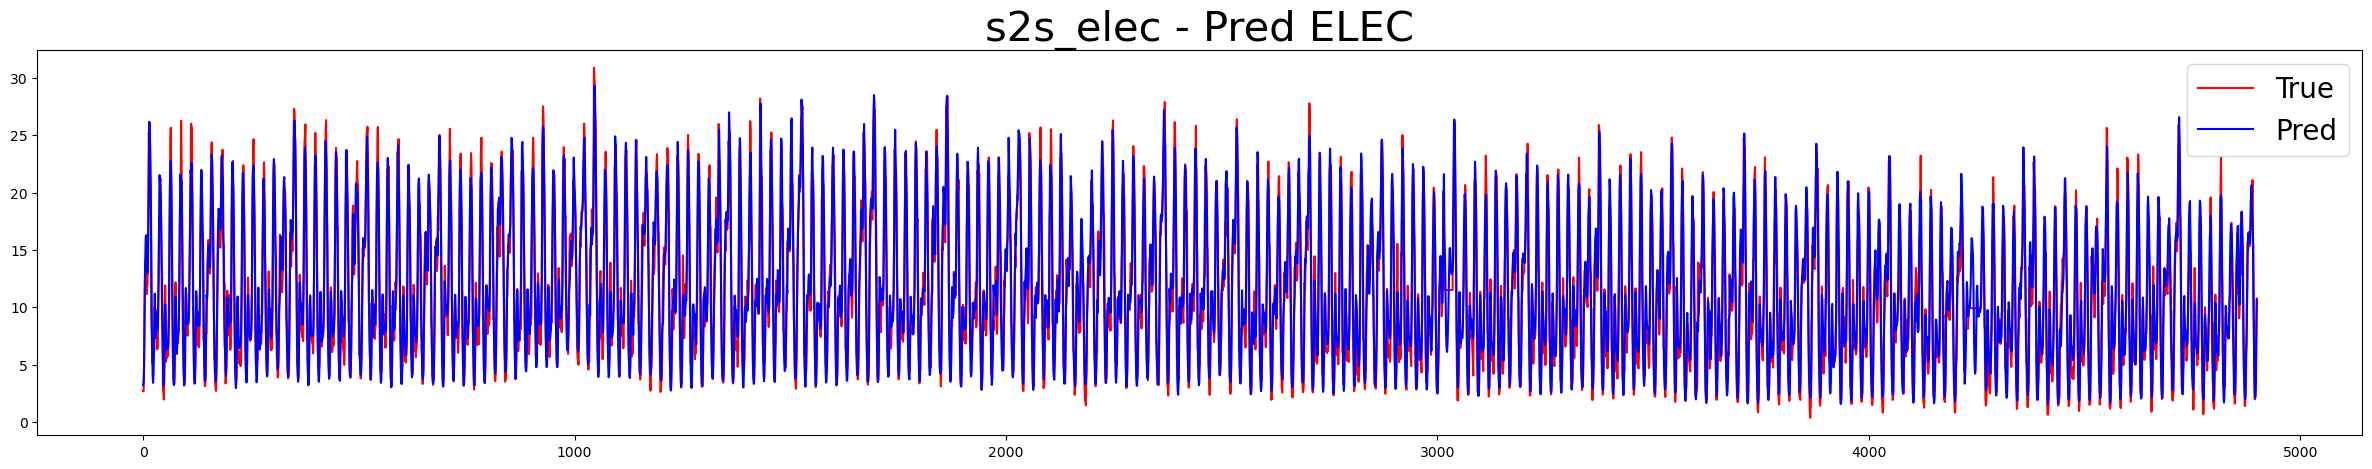

In [ ]:
str_model = 's2s_elec'
com_Model.model_sk_metrics(real_elec, pred_elec)
com_Model.model_visualization(real_elec, pred_elec, str_model + ' - Pred ELEC')

MAE  :  1.3342
MAPE :  0.3256
MSE  :  3.662
RMSE :  1.9136
MBE :  0.2984
R2   :  0.8538


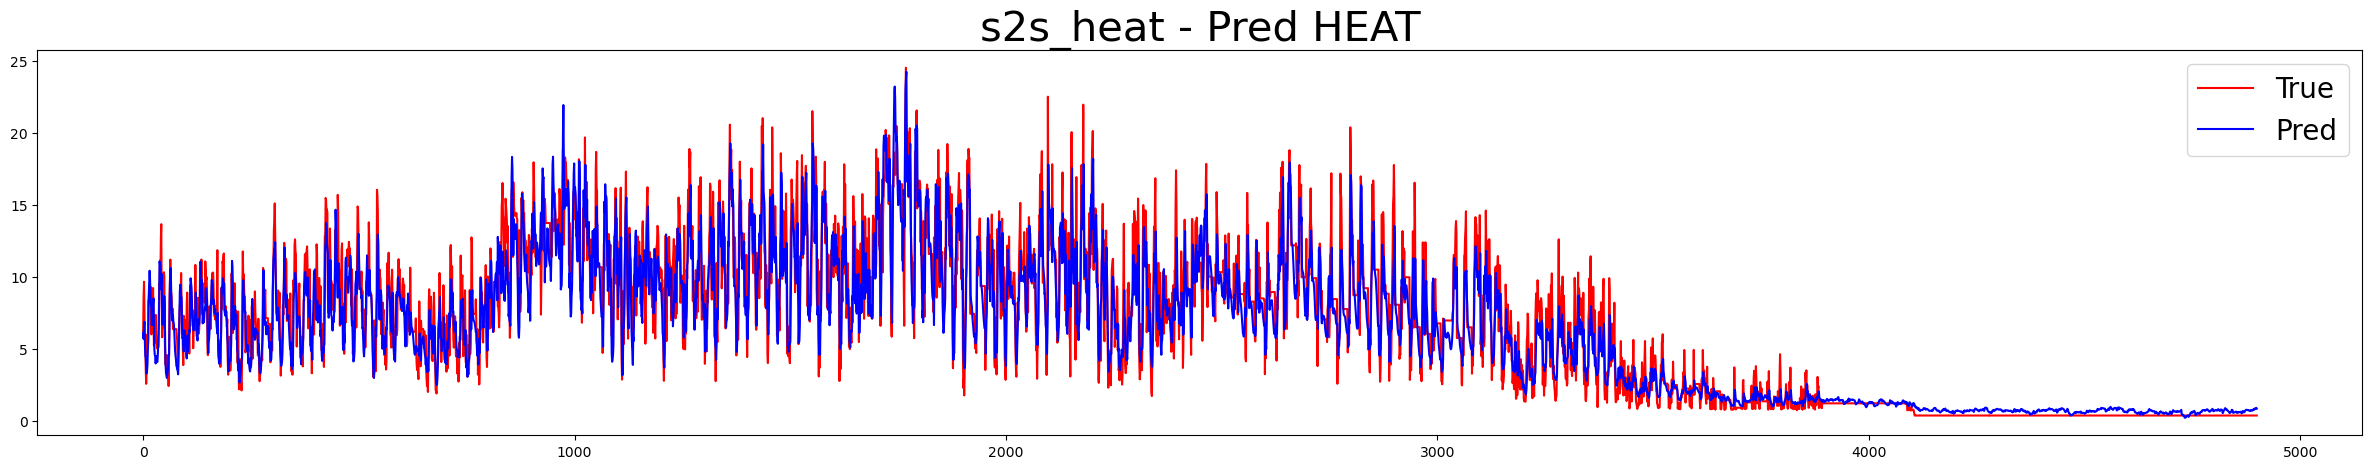

In [ ]:
str_model = 's2s_heat'
com_Model.model_sk_metrics(real_heat, pred_heat)
com_Model.model_visualization(real_heat, pred_heat, str_model + ' - Pred HEAT')

MAE  :  0.0397
MAPE :  0.2137
MSE  :  0.0029
RMSE :  0.054
MBE :  -0.0008
R2   :  0.7691


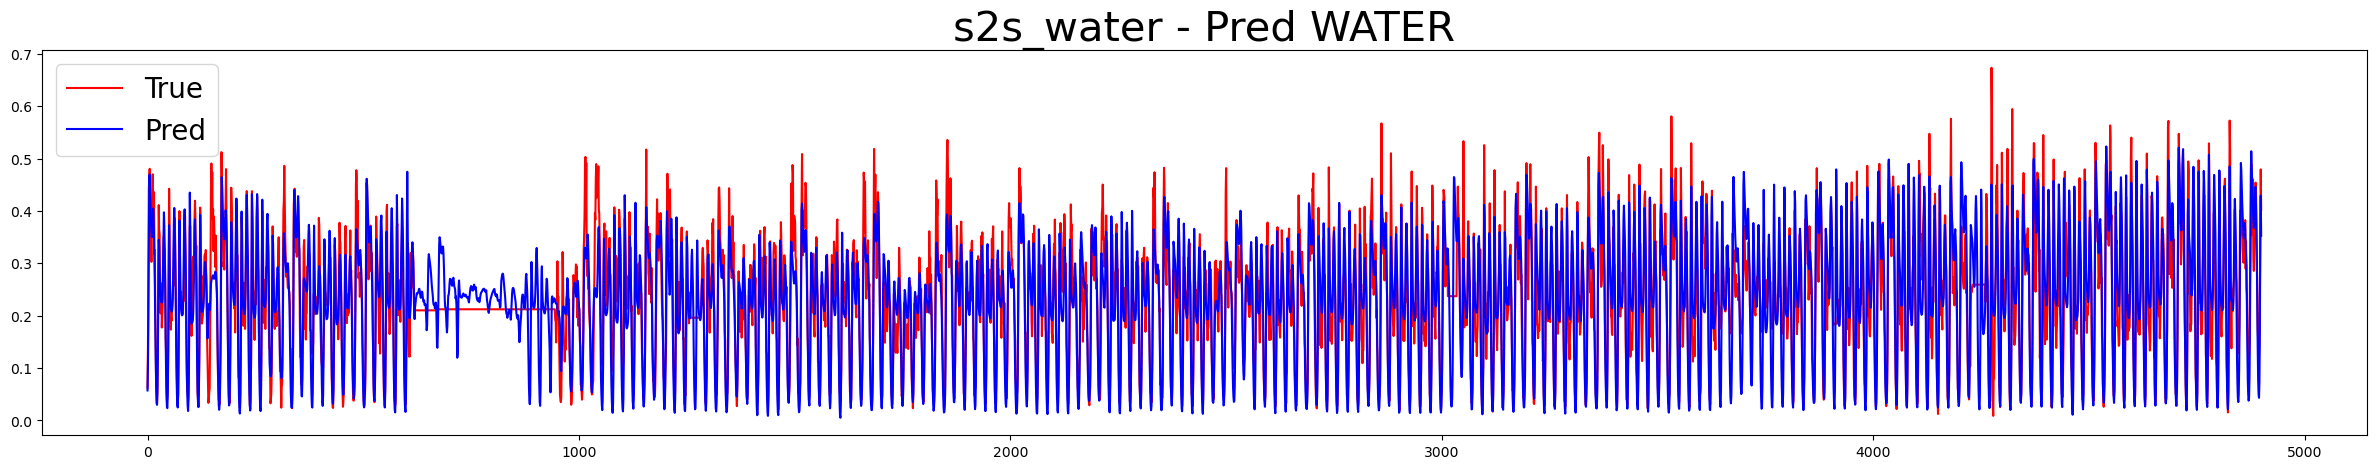

In [ ]:
str_model = 's2s_water'
com_Model.model_sk_metrics(real_water, pred_water)
com_Model.model_visualization(real_water, pred_water, str_model + ' - Pred WATER')

MAE  :  0.0
MAPE :  1.9122
MSE  :  0.0
RMSE :  0.0
MBE :  0.0
R2   :  0.5715


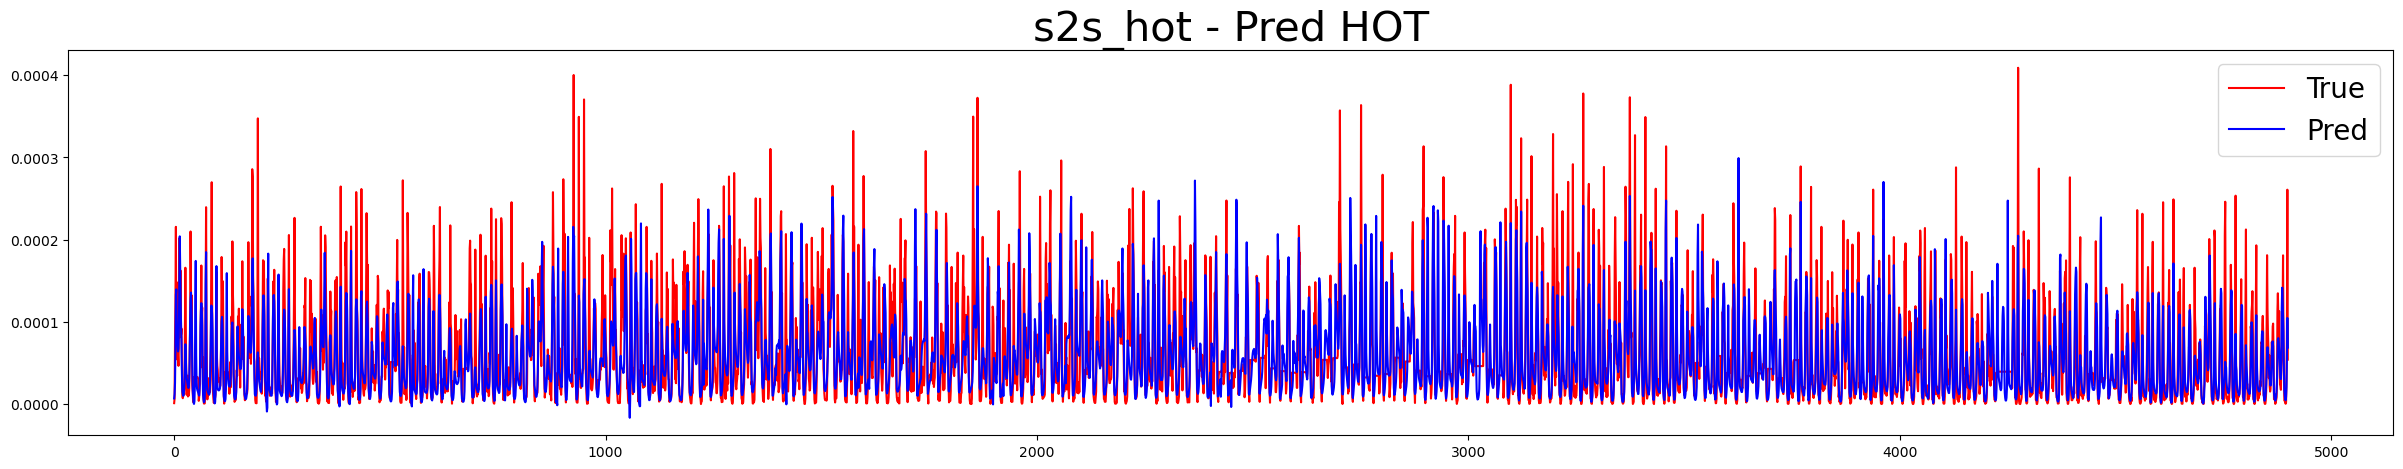

In [ ]:
str_model = 's2s_hot'
com_Model.model_sk_metrics(real_hot, pred_hot)
com_Model.model_visualization(real_hot, pred_hot, str_model + ' - Pred HOT')

MAE  :  0.0
MAPE :  8777.0512
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.4302


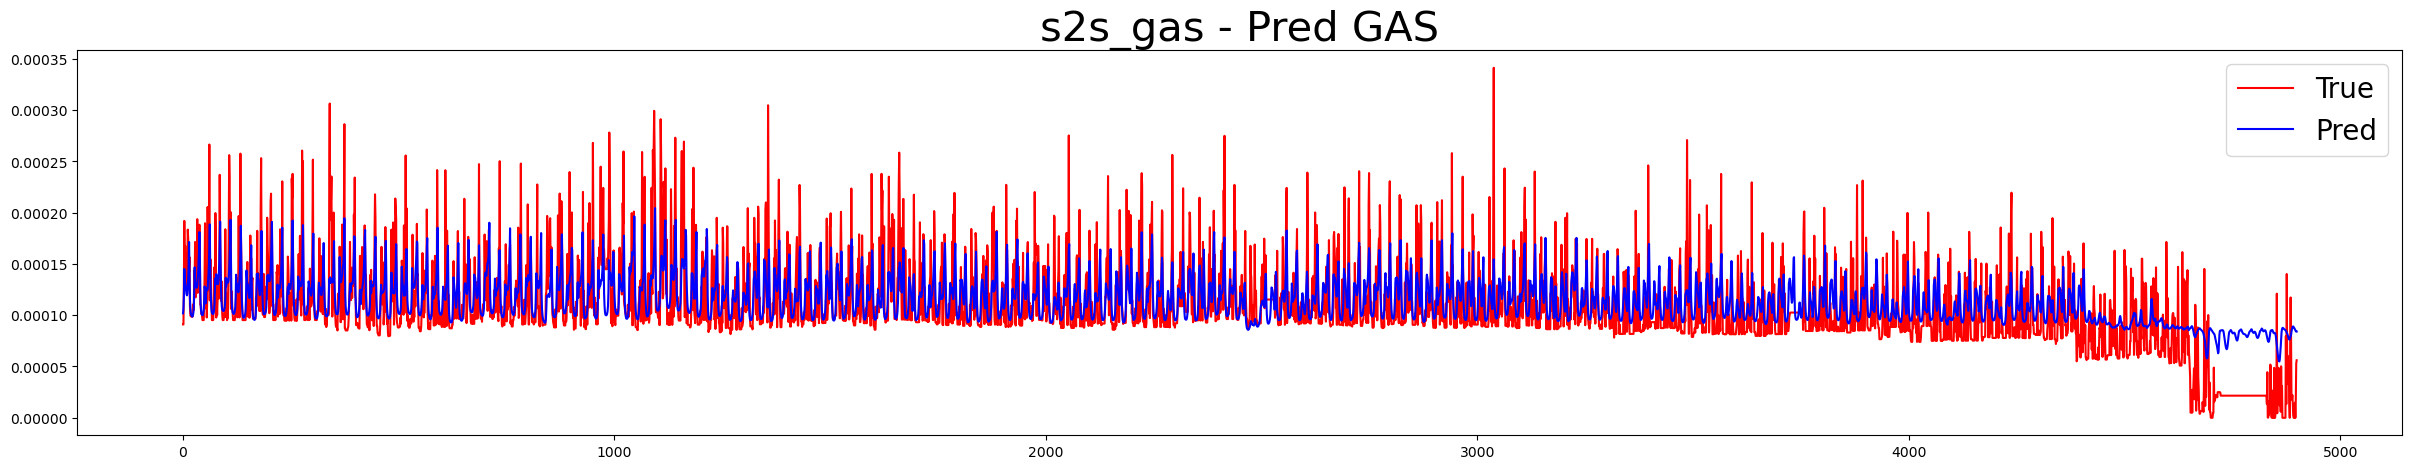

In [ ]:
str_model = 's2s_gas'
com_Model.model_sk_metrics(real_gas, pred_gas)
com_Model.model_visualization(real_gas, pred_gas, str_model + ' - Pred GAS')